In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from auxiliary_methods import *
from zbias_data_generation import MonteCarloSimulation

In [27]:
max_k = 30

In [28]:
M = MonteCarloSimulation(n_simulations=1, dataset_size=10000, random_seed=1976)

Start Monte Carlo Simulation .. 2019-03-13 15:38:56.777423
Start Additive Simulation .. 2019-03-13 15:38:56.777509
Finish Additive Simulation .. 2019-03-13 15:38:56.784891
Start Multiplicative Simulation .. 2019-03-13 15:38:56.784998
Finish Multiplicative Simulation .. 2019-03-13 15:38:56.790025
Finish Monte Carlo Simulation .. 2019-03-13 15:38:56.790110


In [29]:
M.additive_data.shape

(10000, 3)

In [30]:
df = M.additive_data
df.head()

,Z,T,Y
0,1,1,0
1,0,0,0
2,1,1,1
3,1,1,0
4,0,1,0


# Baseline evaluations

In [31]:
IPW = calc_inv_propensity_score_weighting(df)
IPW

0.2227774320880369

In [32]:
baseline_euclidean = calc_matching(df, dist_func='euclidean', k=range(1, max_k+1))
baseline_euclidean[0]

-0.09362168081029291

In [33]:
baseline_mahalanobis = calc_matching(df, dist_func='mahalanobis', k=range(1,max_k+1))
baseline_mahalanobis[0]

-0.09362168081029291

# Evaluations from treatment predictions

In [34]:
model_t_euclidean = calc_model_t_shap_matching(df, dist_func='euclidean', k=range(1,max_k+1))
model_t_euclidean[0]

-0.09362168081029291

In [35]:
model_t_mahalanobis = calc_model_t_shap_matching(df, dist_func='mahalanobis', k=range(1,max_k+1))
model_t_mahalanobis[0]

-0.09362168081029291

# Evaluation from outcome predictions

In [36]:
model_y_euclidean = calc_model_y_shap_matching(df, dist_func='euclidean', k=range(1,max_k+1))
model_y_euclidean[0]

-0.07473309608540925

In [37]:
model_y_mahalanobis = calc_model_y_shap_matching(df, dist_func='mahalanobis', k=range(1,max_k+1))
model_y_mahalanobis[0]

-0.07473309608540925

# Evaluation from outcome and treatment predictions

In [38]:
model_y_model_t_euclidean = calc_model_y_and_model_t_shap_matching(
    df, combining_method='ratio', dist_func='euclidean', k=range(1,max_k+1))
model_y_model_t_euclidean[0]

0.41582261155214895

In [39]:
model_y_model_t_mahalanobis = calc_model_y_and_model_t_shap_matching(
    df, combining_method='ratio', dist_func='mahalanobis', k=range(1,max_k+1))
model_y_model_t_mahalanobis[0]

0.41582261155214895

# Save all joint values

In [49]:
joint_values = pd.DataFrame({'k':range(1, max_k+1), 
                            'baseline_euclidean':baseline_euclidean, 
                            'baseline_mahalanobis':baseline_mahalanobis, 
                            'model_t_euclidean':model_t_euclidean, 
                            'model_t_mahalanobis':model_t_mahalanobis, 
                            'model_y_euclidean':model_y_euclidean, 
                            'model_y_mahalanobis':model_y_mahalanobis, 
                            'model_y_model_t_euclidean':model_y_model_t_euclidean, 
                            'model_y_model_t_mahalanobis':model_y_model_t_mahalanobis
                           })
joint_values.head(30)

,k,baseline_euclidean,baseline_mahalanobis,model_t_euclidean,model_t_mahalanobis,model_y_euclidean,model_y_mahalanobis,model_y_model_t_euclidean,model_y_model_t_mahalanobis
0,1,-0.093622,-0.093622,-0.093622,-0.093622,-0.074733,-0.074733,0.415823,0.415823
1,2,0.161100,0.161100,0.161100,0.161100,0.170545,0.170545,0.415823,0.415823
2,3,0.246008,0.246008,0.246008,0.246008,0.252304,0.252304,0.415823,0.415823
3,4,0.288462,0.288462,0.288462,0.288462,0.293184,0.293184,0.415823,0.415823
4,5,0.313934,0.313934,0.313934,0.313934,0.317711,0.317711,0.415823,0.415823
5,6,0.246008,0.246008,0.246008,0.246008,0.252304,0.252304,0.415823,0.415823
6,7,0.270267,0.270267,0.270267,0.270267,0.275664,0.275664,0.415823,0.415823
7,8,0.227142,0.227142,0.227142,0.227142,0.229503,0.229503,0.290823,0.290823
8,9,0.248107,0.248107,0.248107,0.248107,0.250205,0.250205,0.304712,0.304712
9,10,0.213934,0.213934,0.213934,0.213934,0.217711,0.217711,0.315823,0.315823


In [41]:
joint_values.to_csv('../Data/zbias__additive_outputs.csv')

In [42]:
joint_values = pd.read_csv('../Data/zbias_outputs.csv', index_col=0)

# Plot the joint values

In [43]:
joint_values.columns[1:]

Index(['baseline_euclidean', 'baseline_mahalanobis', 'model_t_euclidean',
       'model_t_mahalanobis', 'model_y_euclidean', 'model_y_mahalanobis',
       'model_y_model_t_euclidean', 'model_y_model_t_mahalanobis'],
      dtype='object')

In [44]:
long_values = pd.DataFrame(columns=['num_neighbors', 'model_type', 'distance', 'ATT value'])
for model_type in ['baseline', 'model_t', 'model_y', 'model_y_model_t']:
    for distance in ['euclidean', 'mahalanobis']:
        long_values = pd.concat([long_values, 
                                 pd.DataFrame({'num_neighbors':joint_values.k, 
                                               'model_type':model_type, 
                                               'distance':distance, 
                                               'ATT value':joint_values['_'.join([model_type, distance])]})])
long_values.shape

(240, 4)

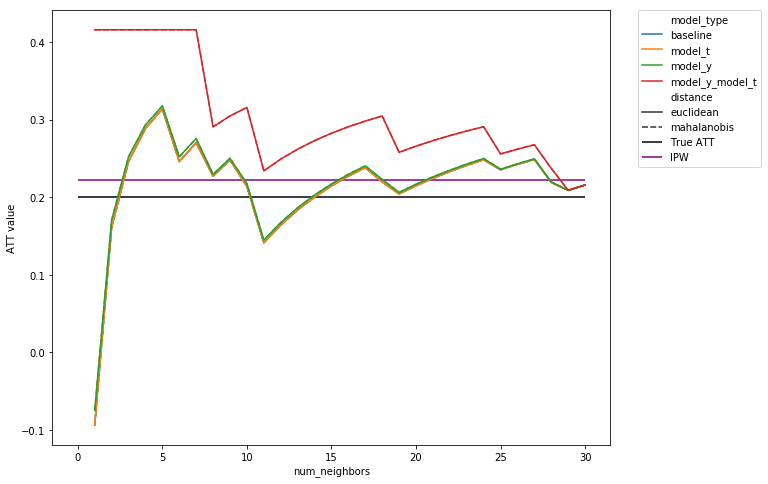

In [50]:
plt.figure(figsize=(10, 8))
ax = sns.lineplot(data=long_values, x='num_neighbors', y='ATT value', hue='model_type', style='distance')
plt.hlines(0.2, 0, joint_values.k.max(), label="True ATT")
plt.hlines(IPW, 0, joint_values.k.max(), colors=['purple'], label="IPW")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../Paper/images/z_bias_additive_ATT_estimations_by_k_neighbors.jpg')
plt.show()